In [ ]:
import sklearn
sklearn.__version__

'1.0.2'

In [ ]:
import numpy as np
#load this dataset
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()
#to access the data
X = data.data
#shape of the data
X.shape

(569, 30)

In [ ]:
#add noise for learning, 569*569
noise = np.random.randn(X.shape[0],X.shape[0]) 
X = np.hstack([X,noise])
#shape of data after adding noise
X.shape

(569, 599)

In [ ]:
#to access the ground truth of the data
Y = data.target

In [ ]:
from sklearn.linear_model import LogisticRegression as LR
#split dataset for training and validation
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [ ]:
#create a model, set the hyperparamter when building the model
lr = LR(solver='liblinear')
#train the model
lr.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [ ]:
#get performance by test data, this model is 92% accuracy for test data
lr.score(X_test, Y_test)

0.9230769230769231

In [ ]:
#we want to know precision and recall
from sklearn.metrics import precision_score, recall_score
precision = precision_score(Y_test,lr.predict(X_test))
recall = recall_score(Y_test, lr.predict(X_test))
print (precision)
print (recall)

0.9333333333333333
0.9438202247191011


In [ ]:
lr.classes_

array([0, 1])

In [ ]:
#TPR=TP/P=TP/TP+FN
#FPR=FP/N=FP/FP+TN
from sklearn.metrics import roc_curve
#for each threshold, get fpr and tpr
fpr, tpr, thresholds = roc_curve(Y_test, lr.predict_proba(X_test)[:,1],pos_label=1)

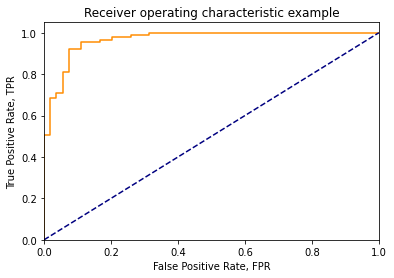

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate, FPR')
plt.ylabel('True Positive Rate, TPR')
plt.title('Receiver operating characteristic example')
plt.show()

In [ ]:
lr1 = LR(C=0.7, solver='liblinear')
lr1.fit(X_train, Y_train)

LogisticRegression(C=0.7, solver='liblinear')

In [ ]:
lr1.score(X_test, Y_test)

0.9370629370629371

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(Y_test,lr1.predict(X_test))
recall = recall_score(Y_test, lr1.predict(X_test))
print (precision)
print (recall)

0.9292929292929293
0.9787234042553191


In [ ]:
lr2 = LR(C=0.1, solver='liblinear')
lr2.fit(X_train, Y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [ ]:
lr2.score(X_test, Y_test)

0.9440559440559441

In [ ]:
precision = precision_score(Y_test,lr2.predict(X_test))
recall = recall_score(Y_test, lr2.predict(X_test))
print (precision)
print (recall)

0.9387755102040817
0.9787234042553191
